In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
class HierarchicalClustering:
    def __init__(self,linkage = 'single'):
        self.linkage  = linkage
        self.history = []
    def euclidian_dist(self,x,y):
        return np.sqrt(np.sum((x-y)**2))
    def comput_dist(self,X):
        n = len(X)
        dist_mat = np.zeros((n,n))
        for i in range(n):
            for j in range(i+1,n):
                dist = self.euclidian_dist(X[i],X[j])
                dist_mat[i,j] = dist_mat[j,i] = dist
        return dist_mat
    def fit(self,X):
        n = len(X)
        clusters = [[i] for i in range(n)]
        self.distances = self.comput_dist(X)
        while len(clusters) > 1:
            min_dist = 1000000
            merge_pair = None
            for i in range(len(clusters)):
                for j in range(i+1,len(clusters)):
                    dist = self._get_cluster_dist(self.distances,clusters[i],clusters[j])
                    if dist < min_dist:
                        min_dist = dist
                        merge_pair = (i,j)
            i,j =  merge_pair
            self.history.append((clusters[i],clusters[j],min_dist))
            new_cluster = clusters[i]+clusters[j]
            clusters = [c for k,c in enumerate(clusters) if k not in [i,j]]
            clusters.append(new_cluster)
        return self
    def _get_cluster_dist(self,dist,c1,c2):
        clsuter_dist = [dist[i,j] for i in c1 for j in c2]
        if self.linkage == 'single':
            return min(clsuter_dist)
        elif self.linkage =='complete':
            return max(clsuter_dist)
        return np.mean(clsuter_dist)
    
    def plot_dendrogram(self):
        plt.figure(figsize=(10, 7))
        plt.title(f"Dendrogram - {self.linkage} linkage")
        
        # Create coordinates for dendrogram
        leaf_positions = np.arange(len(self.history) + 1)
        vertical_positions = {}
        
        # Plot vertical lines
        for i, (c1, c2, dist) in enumerate(self.history):
            # Get or create positions for clusters
            x1 = min(c1)
            x2 = min(c2)
            y = dist
            
            # Plot vertical lines
            plt.vlines(x=x1, ymin=0, ymax=y, colors='blue')
            plt.vlines(x=x2, ymin=0, ymax=y, colors='blue')
            # Plot horizontal line connecting clusters
            plt.hlines(y=y, xmin=min(x1, x2), xmax=max(x1, x2), colors='blue')
            
        plt.xlabel('Point Index')
        plt.ylabel('Distance')
        plt.show()
    

Distance Matrix:


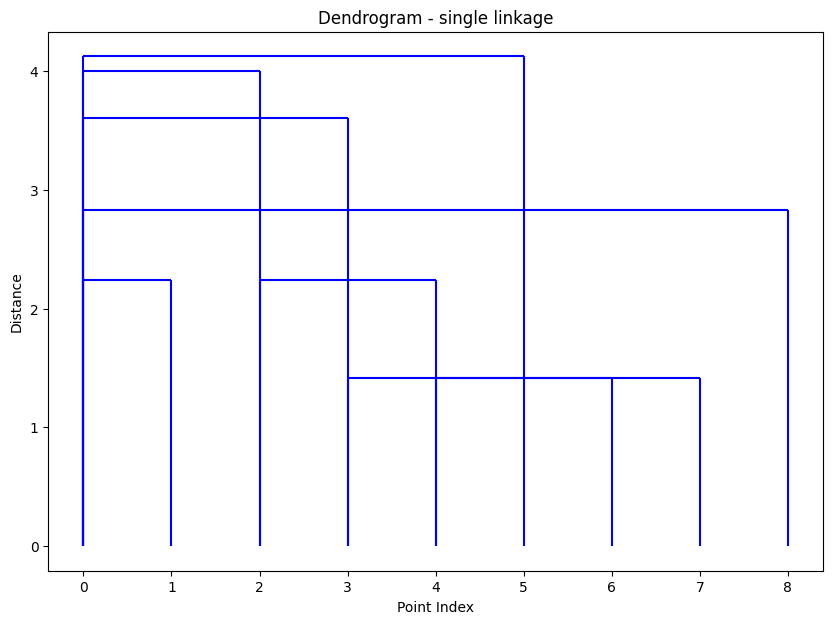

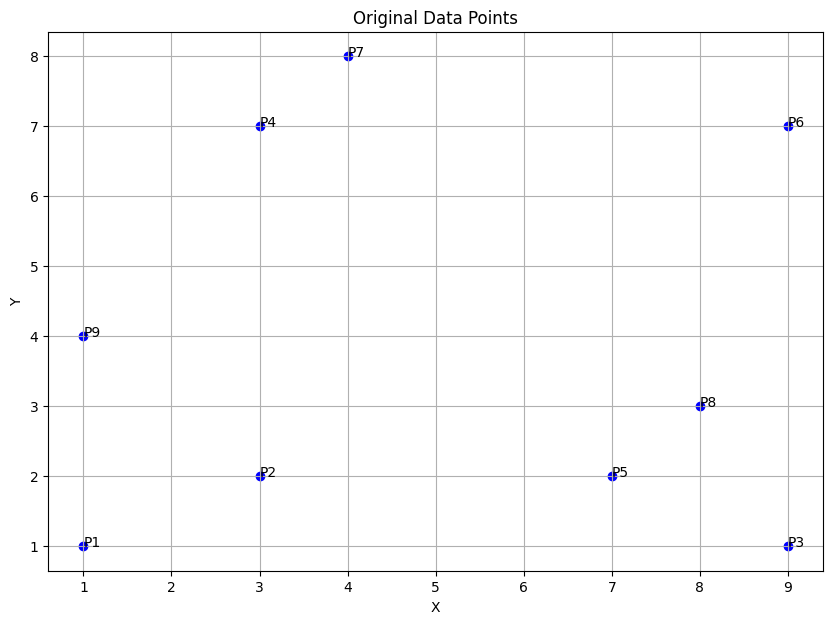

In [11]:
# Example usage with the given dataset
points = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3], [1,4]])

# Create and fit the model
hc = HierarchicalClustering(linkage='single')
hc.fit(points)

# Print distance matrix
print("Distance Matrix:")
# print(hc.distances)

# Plot dendrogram
hc.plot_dendrogram()

# Plot the original points
plt.figure(figsize=(10, 7))
plt.scatter(points[:,0], points[:,1], c='blue')
plt.title('Original Data Points')
plt.xlabel('X')
plt.ylabel('Y')
for i, (x, y) in enumerate(points):
    plt.annotate(f'P{i+1}', (x, y))
plt.grid(True)
plt.show()